names
keroles fayez
mohamed hamdy 
fatema alzhraa
mohamed mohamed elekhnawy
mohamed ahmed mahrous

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')
clolor_pal=sns.color_palette()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score  #get correlation cofficent 
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_excel ('D:/Test.xlsx')
print (df.head(5))

       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size Segmentation  
0            Low          1.0            B  
1        Average          4.0            A  
2            Low          1.0            A  
3           High          2.0            B  
4            Low          4.0            A  


In [5]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [6]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB
None


Data Cleaning

In [7]:
x = df["Work_Experience"].mean()

df["Work_Experience"].fillna(x, inplace = True)

In [8]:
x = df["Ever_Married"].mode()[0]

df["Ever_Married"].fillna(x, inplace = True)

In [9]:
x = df["Graduated"].mode()[0]

df["Graduated"].fillna(x, inplace = True)

In [10]:
x = df["Profession"].mode()[0]

df["Profession"].fillna(x, inplace = True)

In [11]:
x = df["Family_Size"].mode()[0]
df["Family_Size"].fillna(x, inplace = True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [14]:
df.to_clipboard
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.000000,Low,1.0,B
1,458994,Male,Yes,37,Yes,Healthcare,8.000000,Average,4.0,A
2,458996,Female,Yes,69,No,Artist,0.000000,Low,1.0,A
3,459000,Male,Yes,59,No,Executive,11.000000,High,2.0,B
4,459001,Female,No,19,No,Marketing,2.552587,Low,4.0,A


EDA

{'whiskers': [<matplotlib.lines.Line2D at 0x168e66530e0>,
 'caps': [<matplotlib.lines.Line2D at 0x168e6653590>,
 'boxes': [<matplotlib.lines.Line2D at 0x168e6652e10>],
 'medians': [<matplotlib.lines.Line2D at 0x168e6653b60>],
 'fliers': [<matplotlib.lines.Line2D at 0x168e6653e60>],
 'means': []}

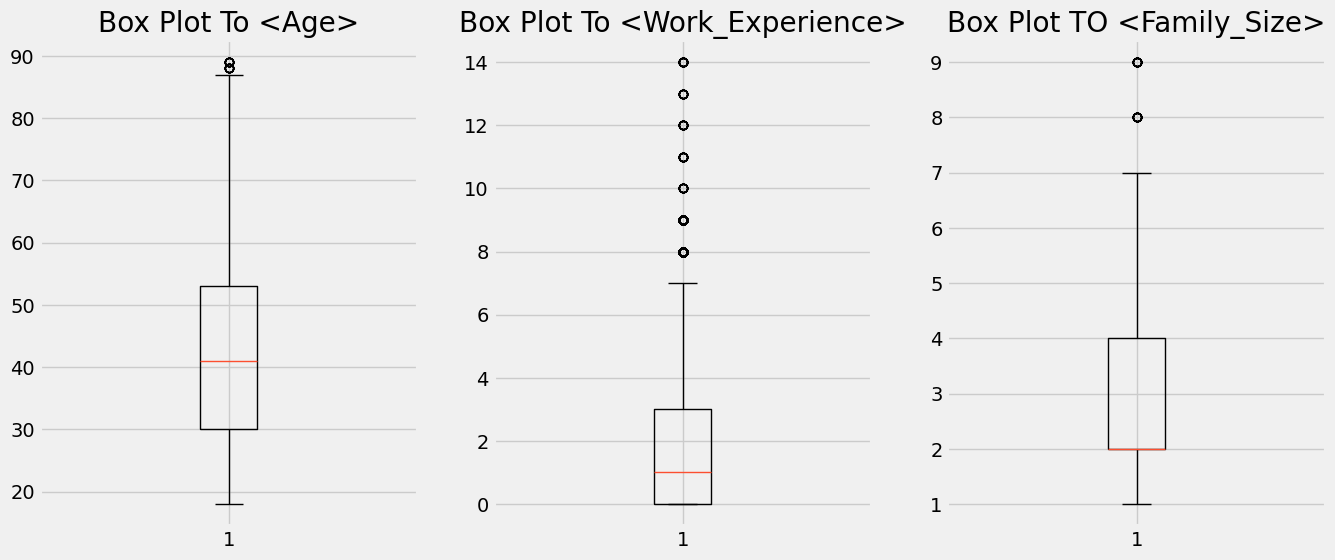

In [15]:
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
plt.title("Box Plot To <Age>")
plt.boxplot(df['Age'])

plt.subplot(1,4,2)
plt.title("Box Plot To <Work_Experience>")
plt.boxplot(df['Work_Experience'])

plt.subplot(1,4,3)
plt.title("Box Plot TO <Family_Size>")
plt.boxplot(df['Family_Size'])


Remove outlayers

In [16]:
for x in df.index:
  if df.loc[x, "Age"] > 87:
    df.drop(x, inplace = True)
    
for x in df.index:
  if df.loc[x, "Work_Experience"] > 6.5:
    df.drop(x, inplace = True)    

for x in df.index:
  if df.loc[x, "Family_Size"] > 7:
    df.drop(x, inplace = True)    

{'whiskers': [<matplotlib.lines.Line2D at 0x168e6826210>,
 'caps': [<matplotlib.lines.Line2D at 0x168e6826840>,
 'boxes': [<matplotlib.lines.Line2D at 0x168e6825ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x168e6826cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x168e6826fc0>],
 'means': []}

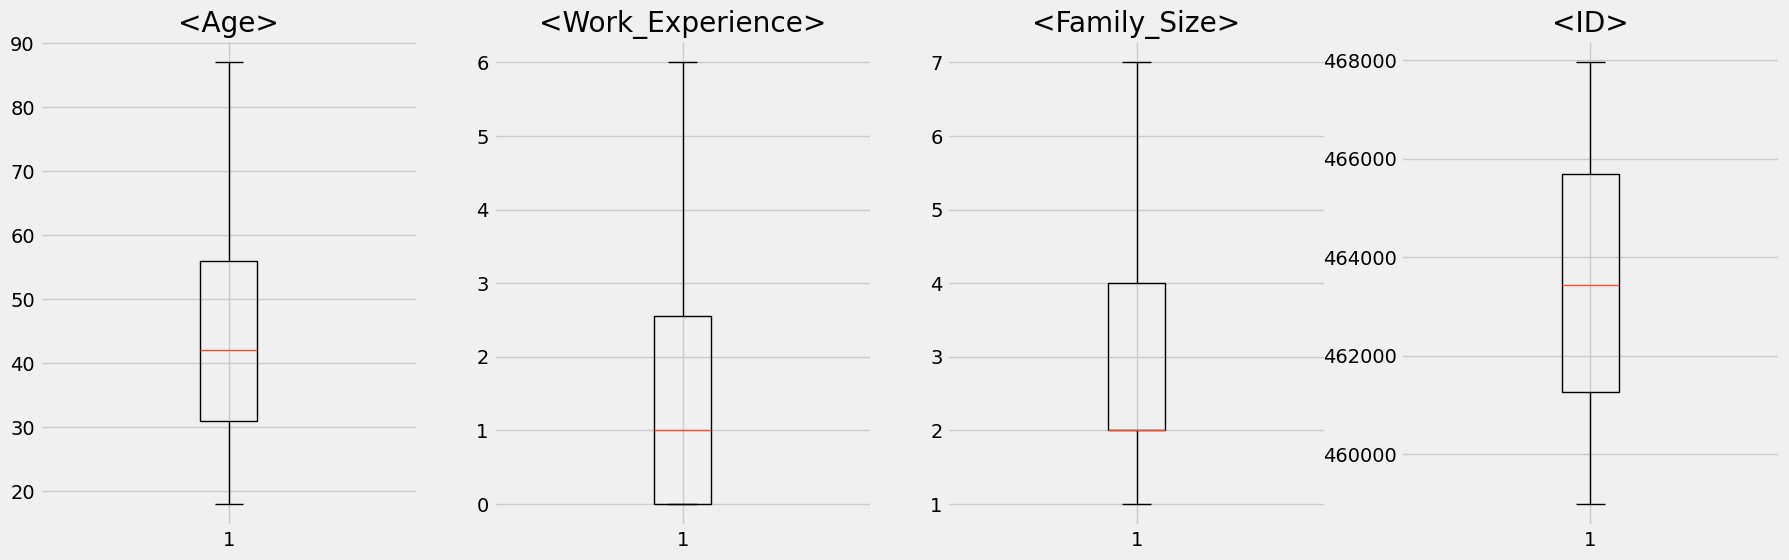

In [17]:
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
plt.title("<Age>")
plt.boxplot(df['Age'])

plt.subplot(1,4,2)
plt.title("<Work_Experience>")
plt.boxplot(df['Work_Experience'])

plt.subplot(1,4,3)
plt.title("<Family_Size>")
plt.boxplot(df['Family_Size'])

plt.subplot(1,4,4)
plt.title("<ID>")
plt.boxplot(df['ID'])


In [18]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2167.000000,2167.000000,2167.000000,2167.000000
mean,463470.565759,44.586525,1.354608,2.779880
std,2602.561684,17.162677,1.524090,1.399776
min,458989.000000,18.000000,0.000000,1.000000
25%,461262.500000,31.000000,0.000000,2.000000
50%,463438.000000,42.000000,1.000000,2.000000
75%,465696.000000,56.000000,2.552587,4.000000
max,467961.000000,87.000000,6.000000,7.000000


Visualization

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_11520\3249957672.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df,palette=['g','r'])


<Axes: xlabel='Gender', ylabel='count'>

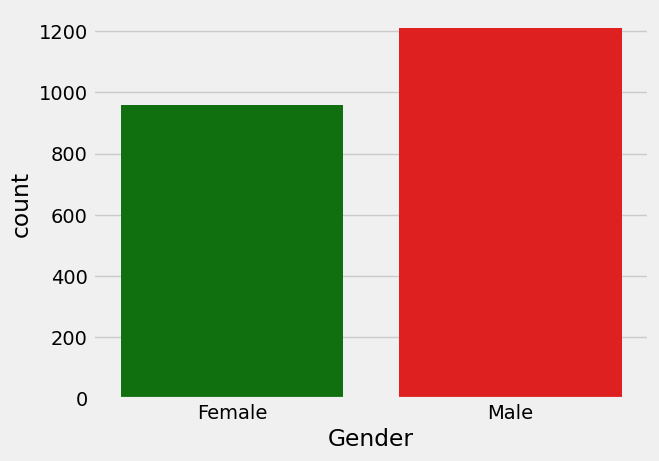

In [19]:
sns.countplot(x='Gender',data=df,palette=['g','r'])
##a plot showing the difference between the number of men and women, the x axis is gender and y axis is count

<Axes: xlabel='Age', ylabel='count'>

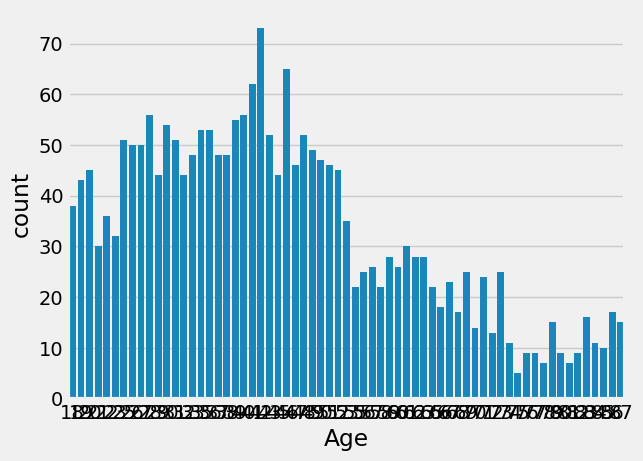

In [20]:
da=df
sns.countplot(x='Age',data=da)

what is the target ages in the smart phone market ?
youth from (18-50) years 

Text(0.5, 1.0, 'relation between SpendingScoreand age')

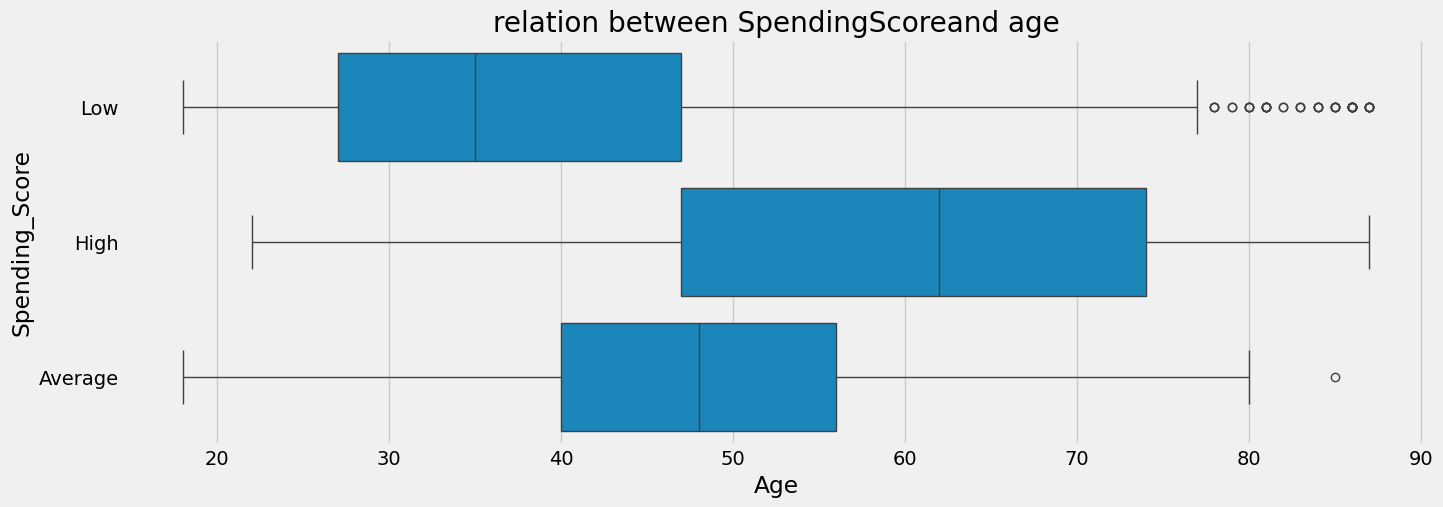

In [21]:

plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='Age',y='Spending_Score')
plt.title('relation between SpendingScoreand age')

Does age affected by spending_score?
yes (the increase in the age years , the increase in pending_score )


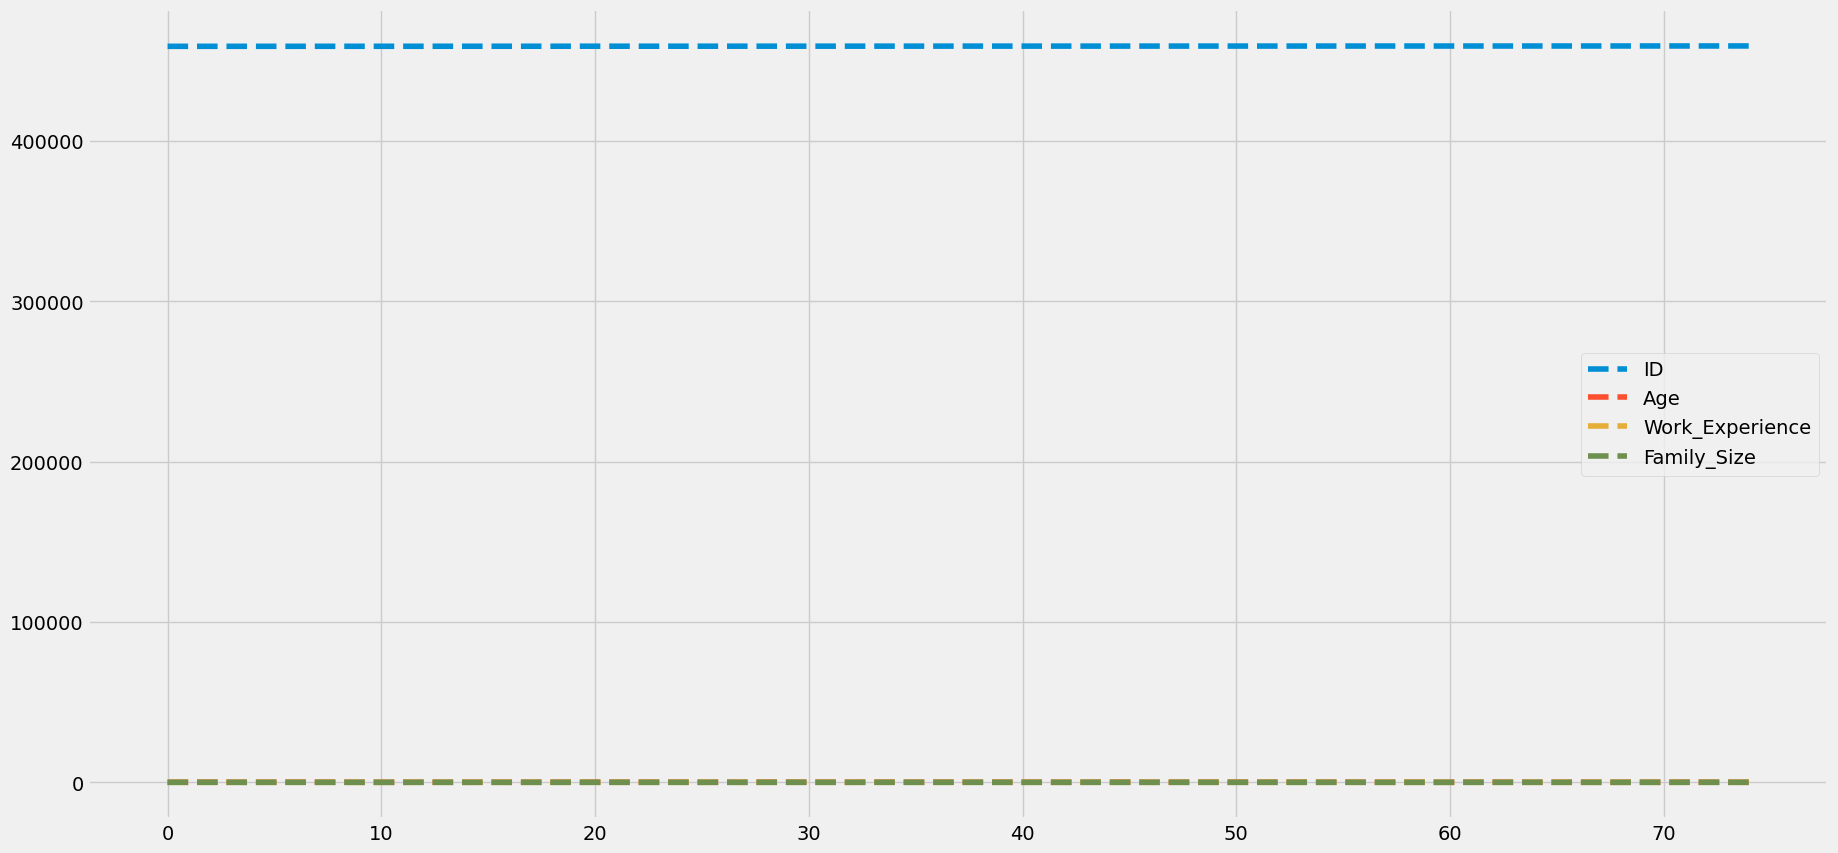

In [22]:
data=df.head(60)
data.plot(figsize=(20,10),style='--')
plt.show()


<Axes: ylabel='count'>

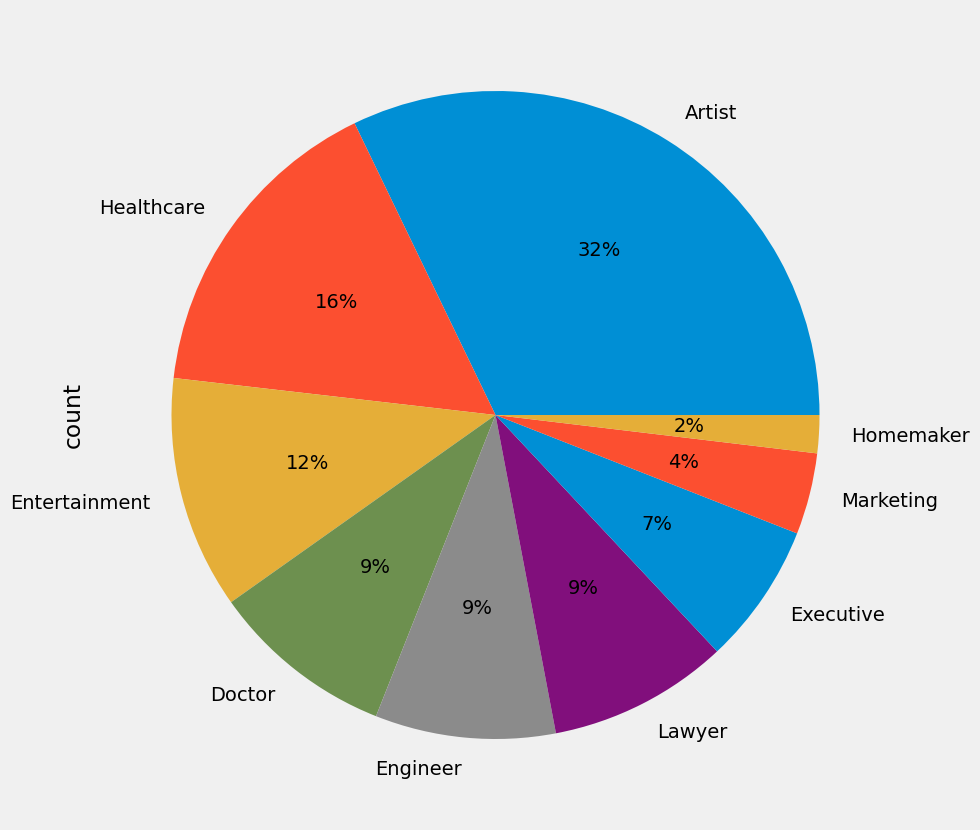

In [23]:
plt .figure(figsize=(10,10))
df['Profession'].value_counts().plot(kind = 'pie',autopct ="%1.0f%%")

what is the most common profession in our target data?
the artists by (32%)  percentage
the heath care by (16%)  percentage

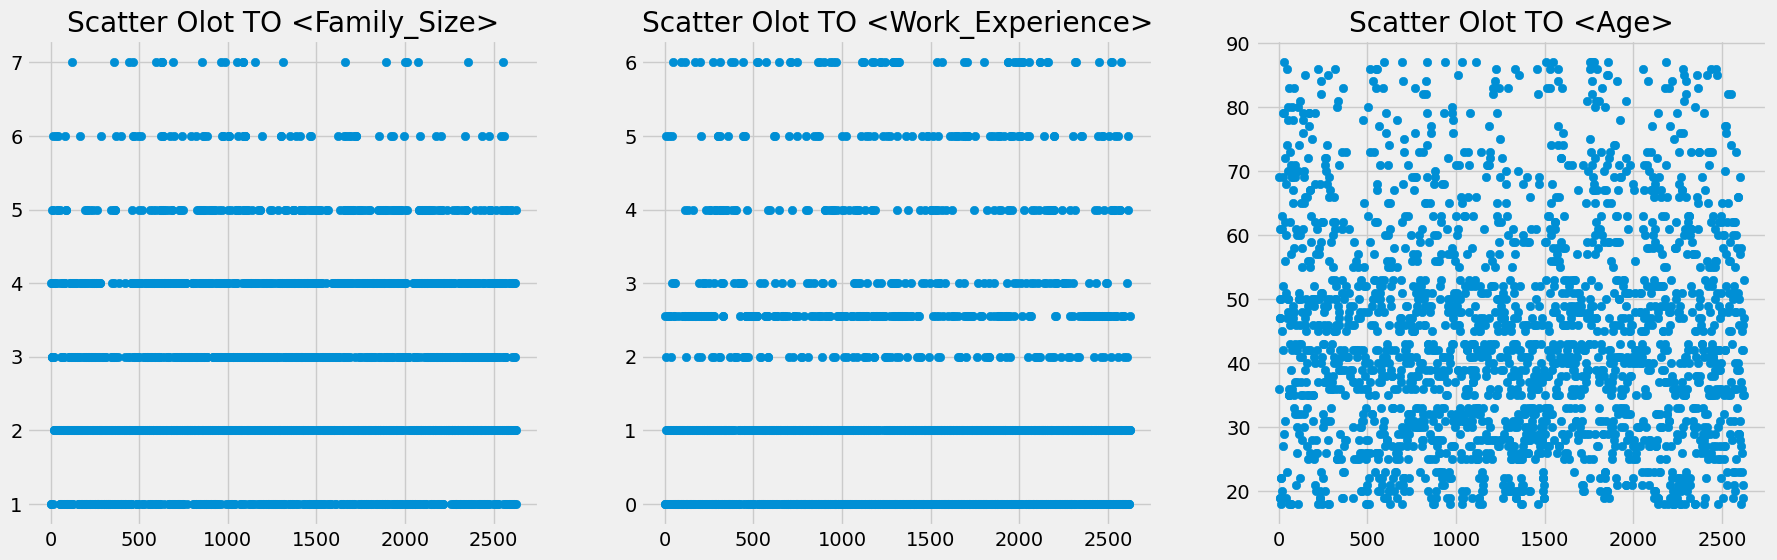

In [24]:
plt.figure(figsize=(20,6))
  
plt.subplot (1,3,1)
plt.title('Scatter Olot TO <Family_Size>')
plt.scatter(df.index,df['Family_Size'])

plt.subplot (1,3,2)
plt.title('Scatter Olot TO <Work_Experience>')
plt.scatter(df.index,df['Work_Experience'])

plt.subplot (1,3,3)
plt.title('Scatter Olot TO <Age>')
plt.scatter(df.index,df['Age'])



C:\Users\Mohamed\AppData\Local\Temp\ipykernel_11520\1340276967.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Ever_Married',y='Spending_Score',data=df,palette=['g','r'])


Ever_Married
Yes    1347
No      820
Name: count, dtype: int64

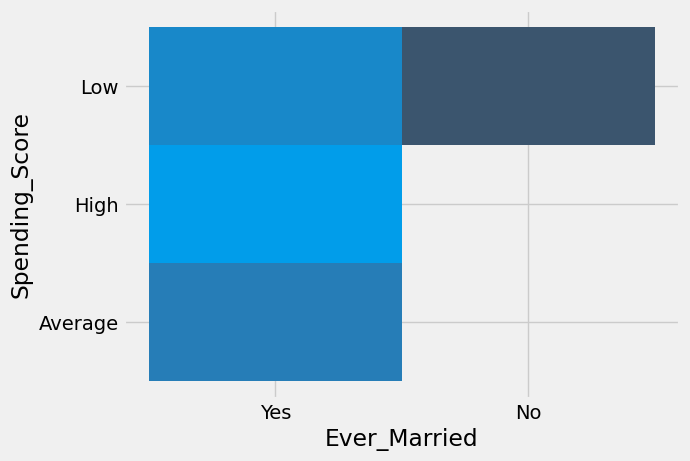

In [25]:
sns.histplot(x='Ever_Married',y='Spending_Score',data=df,palette=['g','r'])
df['Ever_Married'].value_counts()


any relation between (human state & spending score) ?
of course yup 
(single people spends low spendings & married people spend more)

<Axes: xlabel='Family_Size', ylabel='Segmentation'>

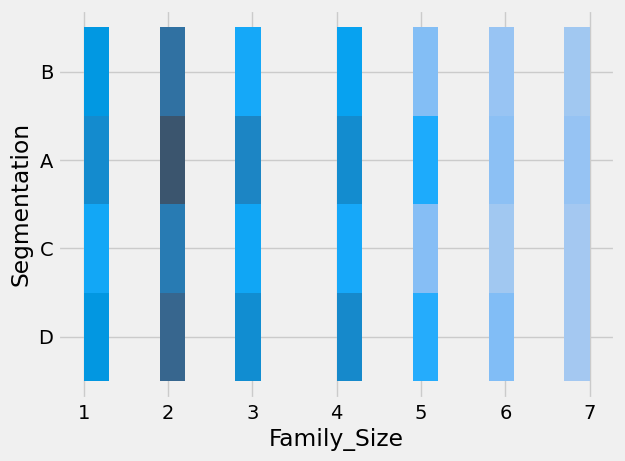

In [26]:
sns.histplot(data=df,x='Family_Size',y='Segmentation')

does the increase of (family_size affect in segementation type) ?
yes , cuz the increase in family size lead to increase rate consumption spendings 
then 
they don't have enough money to buy smart phones so the classified segmentation (c & d )  


<Axes: xlabel='Profession', ylabel='Segmentation'>

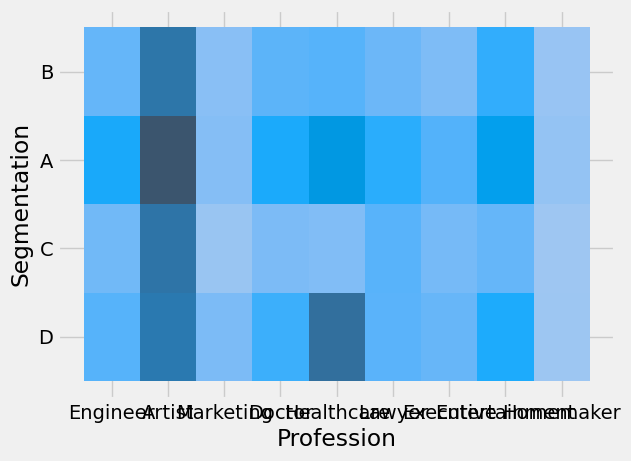

In [27]:
sns.histplot(data=df,x='Profession',y='Segmentation')

what  are the most profession type in our classified segments  will  buy smartphone?
the first are (artists) in (A&B)
the second are (healthcare) in(C&D)

In [28]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.000000,Low,1.0,B
2,458996,Female,Yes,69,No,Artist,0.000000,Low,1.0,A
4,459001,Female,No,19,No,Marketing,2.552587,Low,4.0,A
5,459003,Male,Yes,47,Yes,Doctor,0.000000,High,5.0,C
6,459005,Male,Yes,61,Yes,Doctor,5.000000,Low,3.0,D


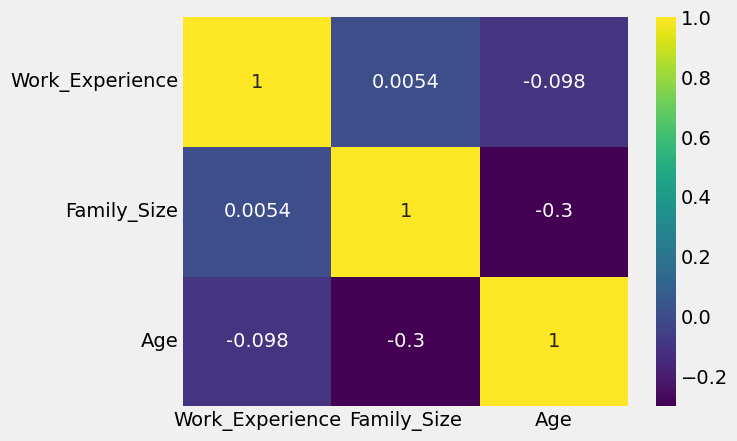

In [29]:
df2=df[['Work_Experience','Family_Size','Age']]
#compute cofficient
corr_mat=df2.corr(method='pearson')
#display correlation matrix in heat map 
sns.heatmap(corr_mat, annot=True,cmap='viridis')
#show plot 
plt.show()

First conclusion
from heatmap we reach that the cofficient factor between (Work_Experience & Age) = -0.098 
that means there is a Weak negative correlation

second conclusion
the cofficient factor between (Work_Experience , Family_Size ) = 0.0054
that means there is a Weak positive correlation

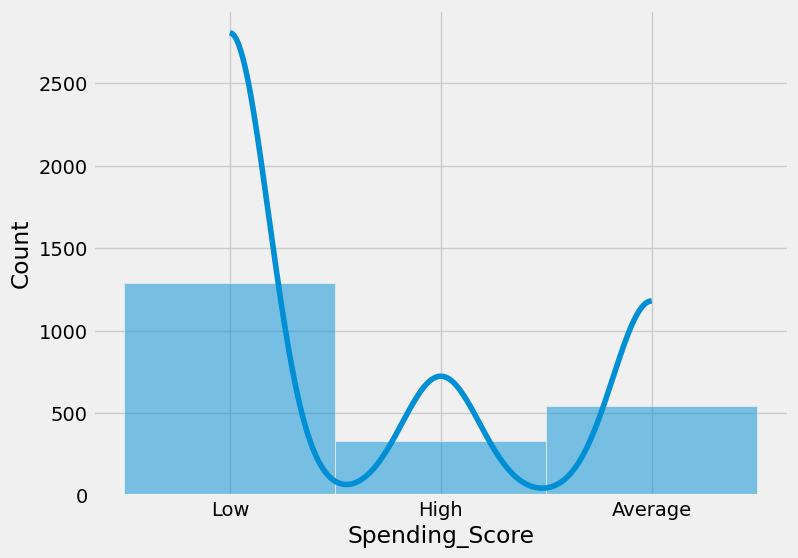

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(df['Spending_Score'],bins=6,kde=True)
plt.xlabel('Spending_Score')
plt.show()




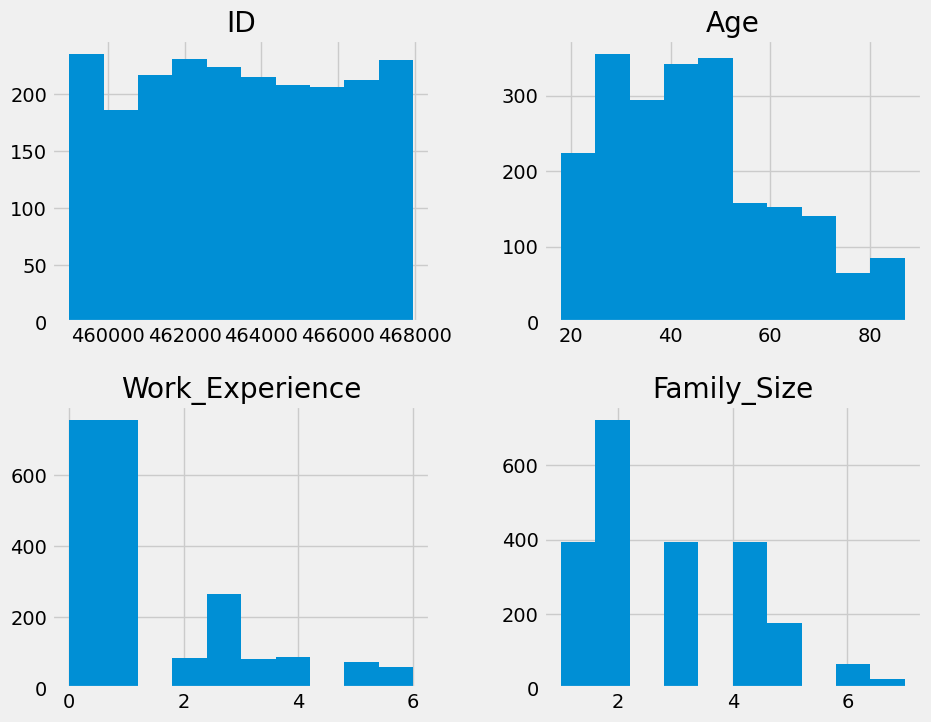

In [31]:
df.hist(figsize=(10,8))
plt.show()

Machine learning

In [32]:
y = df['Segmentation']
x = df.drop('Segmentation', 'ID' , axis = 1)
x_test , x_train , y_test , y_train = train_test_split(x , y , test_size = 0.3 , random_state = 100)
LR = LinearRegression()
LR.fit(x_train , y_train) #training

Y_LR_train_pred = LR.predict(x_train)
Y_LR_test_pred = LR.predict(x_test) #testing

lr_train_mse = mean_sqUared_error(y_train , Y_LR_train_pred)
lr_train_r2 = r2_score(y_train , Y_LR_train_pred)

lr_test_mse = mean_sqUared_error(y_test , Y_LR_test_pred)
lr_test_r2 = r2_score(y_test , Y_LR_test_pred)

print('ML result 0f MSE (Train): ' , lr_train_mse)
print('LR result 0f MSE (Train): ' , lr_train_r2)
print('MR result 0f MSE (Train): ' , lr_test_mse)
print('LR result 0f MSE (Train): ' , lr_test_r2)

lr_results = pd.DataFrame(['LinearRegression' , lr_train_mse , lr_train_r2 , lr_test_mse , lr_test_r2]).transpose()
lr_results.columns = ['Mehod' , 'Training MSE' , 'Training r2' , 'Test MSE' , 'Test r2']
lr_results

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given